In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv('/content/drive/MyDrive/Google_Hackathon/updated_symptoms_dataset.csv')
symptoms = data[['Symptom_1', 'Symptom_2', 'Symptom_3']]
disease_labels = data['Disease']
# name_labels = data['Name']
# city_labels = data['City']
# state_labels = data['State']
specialization_labels = data['Specialization']

# One-hot encode the symptom columns
symptoms_encoded = pd.get_dummies(symptoms)
print("one-hot encoding done")

# Label encode the disease labels
disease_label_encoder = LabelEncoder()
disease_labels_encoded = disease_label_encoder.fit_transform(disease_labels)
print("diseases encoding done")

# # Label encode the name labels
# name_label_encoder = LabelEncoder()
# name_labels_encoded = name_label_encoder.fit_transform(name_labels)
# print("name encoding done")

# # Label encode the city labels
# city_label_encoder = LabelEncoder()
# city_labels_encoded = city_label_encoder.fit_transform(city_labels)
# print("city encoding done")

# # Label encode the state labels
# state_label_encoder = LabelEncoder()
# state_labels_encoded = state_label_encoder.fit_transform(state_labels)
# print("state encoding done")

# Label encode the specialization labels
specialization_label_encoder = LabelEncoder()
specialization_labels_encoded = specialization_label_encoder.fit_transform(specialization_labels)
print("specialization encoding done")

encoded_csv_path = '/content/drive/MyDrive/Google_Hackathon/encoded_dataset.csv'
data.to_csv(encoded_csv_path, index=False)

one-hot encoding done
diseases encoding done
specialization encoding done


In [18]:
# Step 2: Split the data into training and testing sets for Disease
X_train_disease, X_test_disease, y_train_disease, y_test_disease = train_test_split(symptoms_encoded, disease_labels_encoded, test_size=0.2, random_state=42)

# # Step 2: Split the data into training and testing sets for Name
# X_train_name, X_test_name, y_train_name, y_test_name = train_test_split(symptoms_encoded, name_labels_encoded, test_size=0.2, random_state=42)

# # Step 2: Split the data into training and testing sets for City
# X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(symptoms_encoded, city_labels_encoded, test_size=0.2, random_state=42)

# # Step 2: Split the data into training and testing sets for State
# X_train_state, X_test_state, y_train_state, y_test_state = train_test_split(symptoms_encoded, state_labels_encoded, test_size=0.2, random_state=42)

# Step 2: Split the data into training and testing sets for Specialization
X_train_specialization, X_test_specialization, y_train_specialization, y_test_specialization = train_test_split(symptoms_encoded, specialization_labels_encoded, test_size=0.2, random_state=42)


In [19]:
# Step 3: Define and train the neural network model for Disease
from keras.models import model_from_json
from keras.models import load_model, save_model
num_classes_disease = len(disease_label_encoder.classes_)
model_disease = Sequential()
model_disease.add(Dense(64, input_dim=X_train_disease.shape[1], activation='relu'))
model_disease.add(Dense(32, activation='relu'))
model_disease.add(Dense(num_classes_disease, activation='softmax'))

# Compile the model for Disease
model_disease.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for Disease
history_disease = model_disease.fit(X_train_disease, y_train_disease, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

model_disease.save('/content/drive/MyDrive/Google_Hackathon/model_disease.h5')


Epoch 1/50
119/119 [==============================] - 1s 5ms/step - loss: 1.2959 - accuracy: 0.7686 - val_loss: 0.2880 - val_accuracy: 0.9643
Epoch 2/50
119/119 [==============================] - 1s 5ms/step - loss: 0.1015 - accuracy: 0.9887 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 3/50
119/119 [==============================] - 1s 7ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 4/50
119/119 [==============================] - 1s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/50
119/119 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/50
119/119 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Step 3: Define and train the neural network model for Specialization
from keras.models import model_from_json
num_classes_specialization = len(specialization_label_encoder.classes_)
model_specialization = Sequential()
model_specialization.add(Dense(64, input_dim=X_train_specialization.shape[1], activation='relu'))
model_specialization.add(Dense(32, activation='relu'))
model_specialization.add(Dense(num_classes_specialization, activation='softmax'))

# Compile the model for Specialization
model_specialization.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for Specialization
history_specialization = model_specialization.fit(X_train_specialization, y_train_specialization, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

model_specialization.save('/content/drive/MyDrive/Google_Hackathon/model_specialization.h5')

Epoch 1/50
119/119 [==============================] - 1s 4ms/step - loss: 0.5778 - accuracy: 0.8443 - val_loss: 0.1468 - val_accuracy: 0.9895
Epoch 2/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9958 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 3/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/50
119/119 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/50
119/119 [==============================] - 0s 3ms/step - loss: 9.8533e-04 - accuracy: 1.0000 - val_loss: 7.6331e-04 - val_accuracy: 1.0000
Epoch 7/50
119/119 [==============================] - 0s 3ms/step - loss: 6.4319e-04 - accuracy: 1.0000 - val_loss: 5.1126e-04 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Step 4: Evaluate the models
# For Disease
y_pred_probs_disease = model_disease.predict(X_test_disease)
y_pred_classes_disease = np.argmax(y_pred_probs_disease, axis=1)

accuracy_disease = accuracy_score(y_test_disease, y_pred_classes_disease)
precision_disease = precision_score(y_test_disease, y_pred_classes_disease, average='weighted')
recall_disease = recall_score(y_test_disease, y_pred_classes_disease, average='weighted')
f1_disease = f1_score(y_test_disease, y_pred_classes_disease, average='weighted')

# # For Name
# y_pred_probs_name = model_name.predict(X_test_name)
# y_pred_classes_name = np.argmax(y_pred_probs_name, axis=1)

# accuracy_name = accuracy_score(y_test_name, y_pred_classes_name)
# precision_name = precision_score(y_test_name, y_pred_classes_name, average='weighted')
# recall_name = recall_score(y_test_name, y_pred_classes_name, average='weighted')
# f1_name = f1_score(y_test_name, y_pred_classes_name, average='weighted')

# # For City
# y_pred_probs_city = model_city.predict(X_test_city)
# y_pred_classes_city = np.argmax(y_pred_probs_city, axis=1)

# accuracy_city = accuracy_score(y_test_city, y_pred_classes_city)
# precision_city = precision_score(y_test_city, y_pred_classes_city, average='weighted')
# recall_city = recall_score(y_test_city, y_pred_classes_city, average='weighted')
# f1_city = f1_score(y_test_city, y_pred_classes_city, average='weighted')

# # For State
# y_pred_probs_state = model_state.predict(X_test_state)
# y_pred_classes_state = np.argmax(y_pred_probs_state, axis=1)

# accuracy_state = accuracy_score(y_test_state, y_pred_classes_state)
# precision_state = precision_score(y_test_state, y_pred_classes_state, average='weighted')
# recall_state = recall_score(y_test_state, y_pred_classes_state, average='weighted')
# f1_state = f1_score(y_test_state, y_pred_classes_state, average='weighted')

# For Specialization
y_pred_probs_specialization = model_specialization.predict(X_test_specialization)
y_pred_classes_specialization = np.argmax(y_pred_probs_specialization, axis=1)

accuracy_specialization = accuracy_score(y_test_specialization, y_pred_classes_specialization)
precision_specialization = precision_score(y_test_specialization, y_pred_classes_specialization, average='weighted')
recall_specialization = recall_score(y_test_specialization, y_pred_classes_specialization, average='weighted')
f1_specialization = f1_score(y_test_specialization, y_pred_classes_specialization, average='weighted')



38/38 [==============================] - 0s 2ms/step


In [22]:
# Printing evaluation metrics
print("Disease Evaluation:")
print("Accuracy: {:.2f}%".format(accuracy_disease * 100))
print("Precision: {:.2f}".format(precision_disease))
print("Recall: {:.2f}".format(recall_disease))
print("F1 Score: {:.2f}".format(f1_disease))

# print("\nName Evaluation:")
# print("Accuracy: {:.2f}%".format(accuracy_name * 100))
# print("Precision: {:.2f}".format(precision_name))
# print("Recall: {:.2f}".format(recall_name))
# print("F1 Score: {:.2f}".format(f1_name))

# print("\nCity Evaluation:")
# print("Accuracy: {:.2f}%".format(accuracy_city * 100))
# print("Precision: {:.2f}".format(precision_city))
# print("Recall: {:.2f}".format(recall_city))
# print("F1 Score: {:.2f}".format(f1_city))

# print("\nState Evaluation:")
# print("Accuracy: {:.2f}%".format(accuracy_state * 100))
# print("Precision: {:.2f}".format(precision_state))
# print("Recall: {:.2f}".format(recall_state))
# print("F1 Score: {:.2f}".format(f1_state))

print("\nSpecialization Evaluation:")
print("Accuracy: {:.2f}%".format(accuracy_specialization * 100))
print("Precision: {:.2f}".format(precision_specialization))
print("Recall: {:.2f}".format(recall_specialization))
print("F1 Score: {:.2f}".format(f1_specialization))


Disease Evaluation:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Specialization Evaluation:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


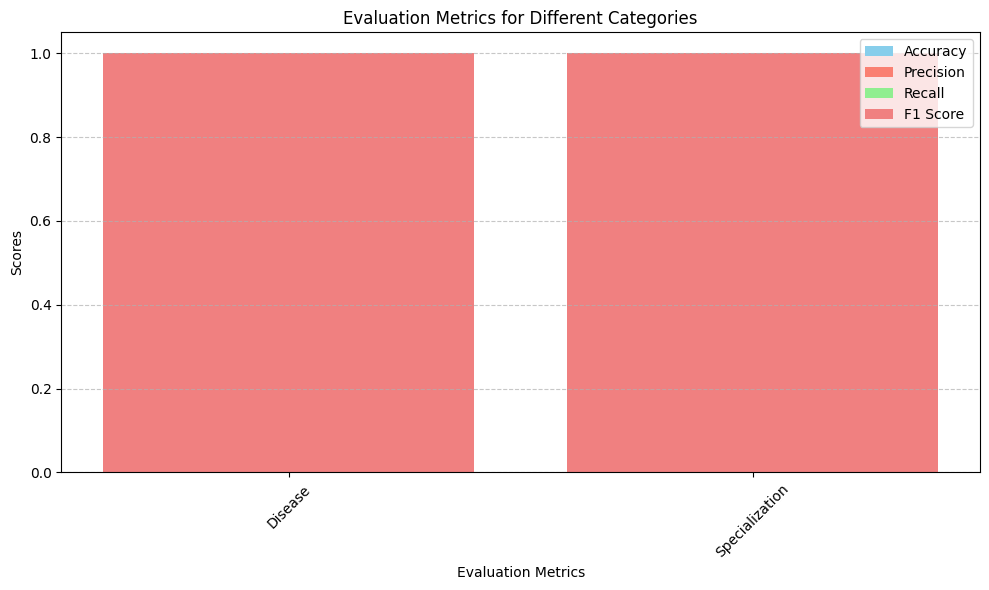

In [23]:
# Classification Report and Confusion Matrix can be printed similarly for each model

# Step 5: Plotting the graph
# Define the labels and evaluation metrics
labels = ['Disease', 'Specialization']
accuracy_scores = [accuracy_disease, accuracy_specialization]
precision_scores = [precision_disease, precision_specialization]
recall_scores = [recall_disease, recall_specialization]
f1_scores = [f1_disease, f1_specialization]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(labels, accuracy_scores, color='skyblue', label='Accuracy')
plt.bar(labels, precision_scores, color='salmon', label='Precision')
plt.bar(labels, recall_scores, color='lightgreen', label='Recall')
plt.bar(labels, f1_scores, color='lightcoral', label='F1 Score')

plt.xlabel('Evaluation Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Different Categories')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()